In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel('output.xlsx')

In [6]:
df.head()

,Unnamed: 0,funded_amnt,funded_amnt_inv,issue_d,loan_status,pymnt_plan,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,total_amnt_to_be_paid,late_fee_over_time,r2,r3,r4,r1
0,0,5150,5150.0,Nov-11,1,n,266.22,266.22,7674.25000,7674.25,...,2790.47,0.0,0.0,0.0,6109.96,0.0,0.0,0.571375,1.000000,0.0
1,1,20000,20000.0,Oct-11,0,n,0.00,0.00,22610.98773,22610.99,...,2610.99,0.0,0.0,0.0,21780.00,0.0,0.0,0.130550,1.000000,0.0
2,2,12800,12750.0,Nov-11,0,n,0.00,0.00,14401.17047,14344.92,...,1601.17,0.0,0.0,0.0,14946.56,0.0,0.0,0.125091,0.996094,0.0
3,3,14000,14000.0,Oct-11,0,n,0.00,0.00,14793.06399,14793.06,...,793.06,0.0,0.0,0.0,16417.80,0.0,0.0,0.056647,1.000000,0.0
4,4,15000,14975.0,Nov-11,1,n,754.69,753.37,21457.45000,21421.81,...,7212.13,0.0,0.0,0.0,17515.50,0.0,0.0,0.506281,0.998333,0.0


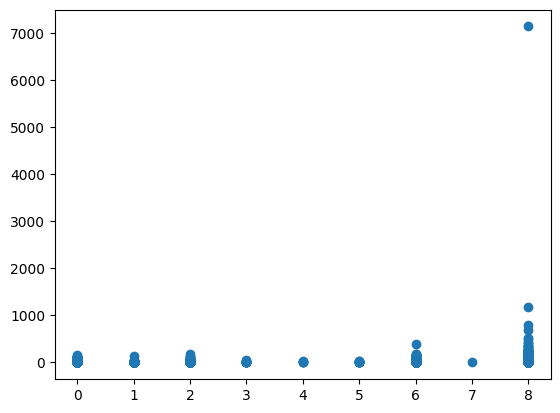

In [7]:
plt.scatter(df['loan_status'], df['r1'])

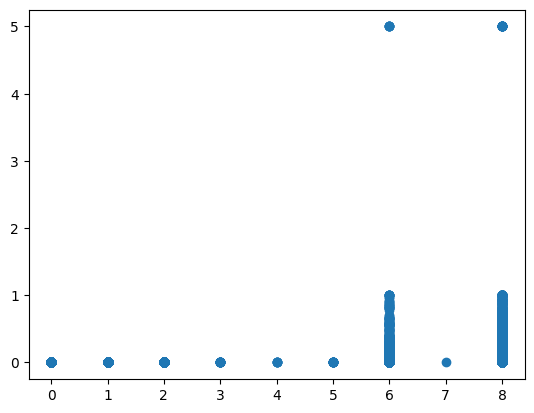

In [8]:
plt.scatter(df['loan_status'], df['r2'])

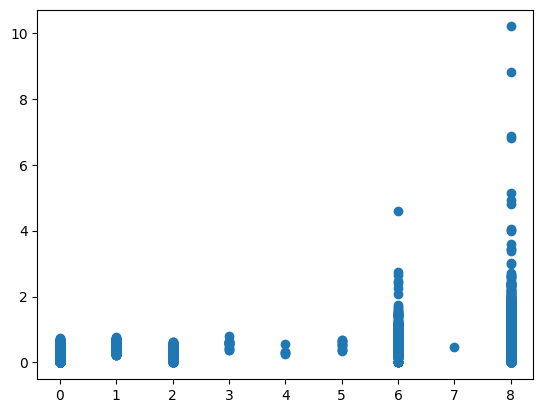

In [9]:
plt.scatter(df['loan_status'], df['r3'])

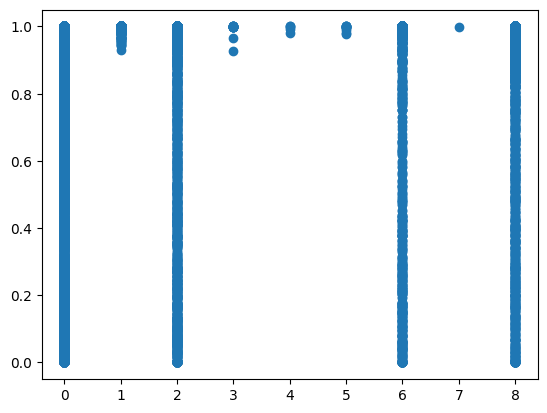

In [10]:
plt.scatter(df['loan_status'], df['r4'])

In [12]:
from sklearn.cluster import DBSCAN, KMeans

In [13]:
model = DBSCAN()

In [14]:
X = df['loan_status'] 

In [15]:
filtered_indices = X[X.isin([3, 4])].index

In [16]:
filtered_indices

Index([36094, 36267, 36337, 36384, 36440, 36472, 36527, 36710, 36749, 36760,
       36786, 41823, 41874, 41880, 41909, 41927, 42068, 42195, 42284, 42392,
       42410],
      dtype='int64')

In [17]:
X = np.array(df['r1']).reshape(len(df), 1)
y = np.array(df['loan_status']).reshape(len(df), 1)

In [18]:
arr = np.hstack((X, y))

In [19]:
arr = arr[filtered_indices]

In [20]:
arr

array([[ 0.        ,  3.        ],
       [ 0.        ,  3.        ],
       [ 0.        ,  4.        ],
       [28.09331712,  4.        ],
       [ 0.        ,  3.        ],
       [ 0.        ,  3.        ],
       [61.0421124 ,  3.        ],
       [ 0.        ,  3.        ],
       [ 0.        ,  3.        ],
       [ 0.        ,  3.        ],
       [ 0.        ,  3.        ],
       [16.96745296,  3.        ],
       [ 0.        ,  3.        ],
       [ 0.        ,  3.        ],
       [ 0.        ,  4.        ],
       [ 0.        ,  4.        ],
       [ 0.        ,  3.        ],
       [38.59103221,  3.        ],
       [ 0.        ,  3.        ],
       [ 0.        ,  4.        ],
       [ 0.        ,  3.        ]])

In [21]:
labels = model.fit_predict(arr)

In [22]:
data = pd.DataFrame(arr)
data

,0,1
0,0.000000,3.0
1,0.000000,3.0
2,0.000000,4.0
3,28.093317,4.0
4,0.000000,3.0
5,0.000000,3.0
6,61.042112,3.0
7,0.000000,3.0
8,0.000000,3.0
9,0.000000,3.0


In [23]:
data['label'] = labels

<Axes: xlabel='1', ylabel='0'>

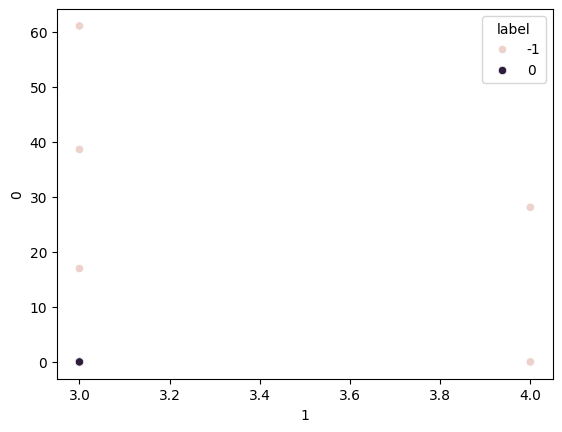

In [24]:
sns.scatterplot(x = data[1], y = data[0], hue=data['label'])

In [25]:
Km = KMeans(n_clusters=2)

In [26]:
data['label'] = Km.fit_predict(arr)

<Axes: xlabel='1', ylabel='0'>

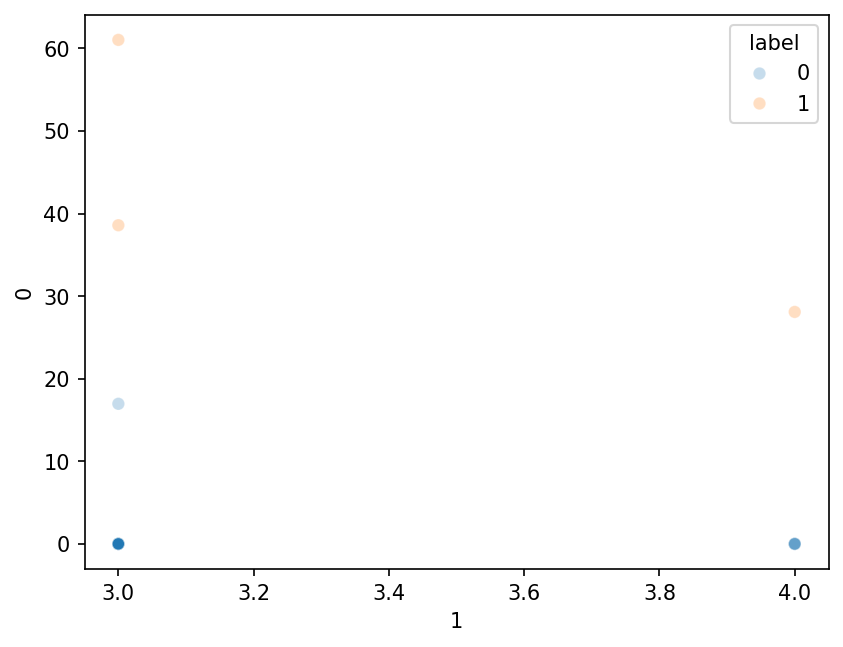

In [27]:
plt.figure(dpi=150)
sns.scatterplot(x=data[1], y=data[0], hue=data['label'], alpha=0.25)

In [28]:
from sklearn.mixture import GaussianMixture

In [29]:
gmm = GaussianMixture(n_components=2)

In [30]:
data['label'] = gmm.fit_predict(arr)

<Axes: xlabel='1', ylabel='0'>

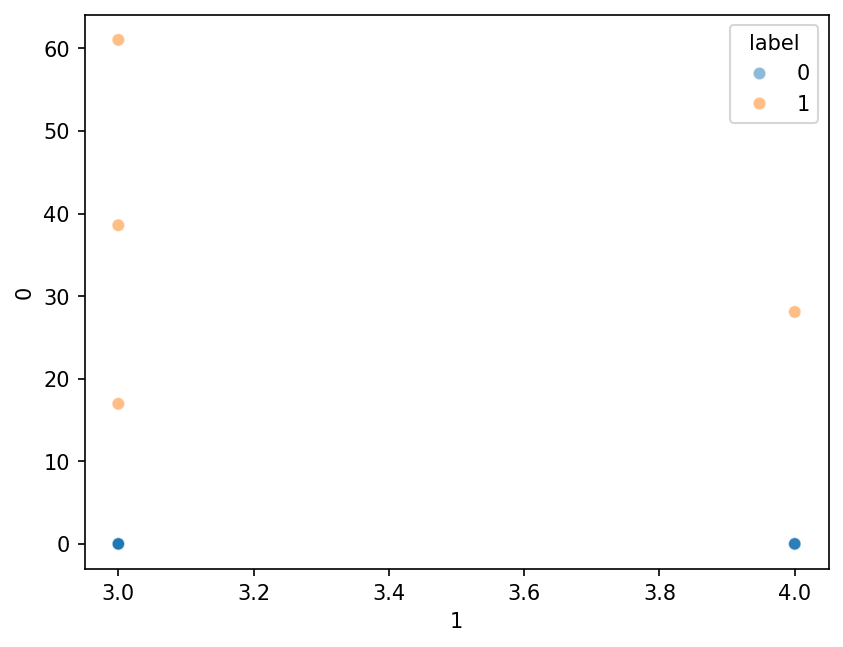

In [31]:
plt.figure(dpi=150)
sns.scatterplot(x=data[1], y=data[0], hue=data['label'], alpha=0.5)

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
model = AgglomerativeClustering(n_clusters=2)

In [34]:
data['label'] = model.fit_predict(arr)

<Axes: xlabel='1', ylabel='0'>

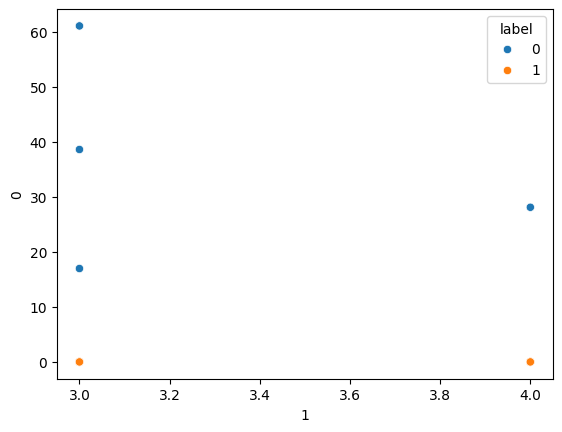

In [35]:
sns.scatterplot(x=data[1], y=data[0], hue=data['label'])

In [36]:
X_r2 = np.array(df['r2']).reshape(len(df), 1)
X_r3 = np.array(df['r3']).reshape(len(df), 1)
X_r4 = np.array(df['r4']).reshape(len(df), 1)

In [37]:
arr_r2 = np.hstack((X_r2, y))
arr_r3 = np.hstack((X_r3, y))
arr_r4 = np.hstack((X_r2, y))

In [38]:
arr_r2 = arr_r2[filtered_indices]
arr_r3 = arr_r3[filtered_indices]
arr_r4 = arr_r4[filtered_indices]

In [39]:
km2 = KMeans(n_clusters=2)
km3 = KMeans(n_clusters=2)
km4 = KMeans(n_clusters=2)

gmm_r2 = GaussianMixture(n_components=2)
gmm_r3 = GaussianMixture(n_components=2)
gmm_r4 = GaussianMixture(n_components=2)

In [40]:
df_r2 = pd.DataFrame(arr_r2)
df_r3 = pd.DataFrame(arr_r3)
df_r4 = pd.DataFrame(arr_r4)

In [41]:
df_r2['gmm'] = gmm_r2.fit_predict(arr_r2)
df_r3['gmm'] = gmm_r3.fit_predict(arr_r3)
df_r4['gmm'] = gmm_r4.fit_predict(arr_r4)

df_r2['km'] = km2.fit_predict(arr_r2)
df_r3['km'] = km3.fit_predict(arr_r3)
df_r4['km'] = km4.fit_predict(arr_r4)

Text(0.5, 1.0, 'KMeans: r4')

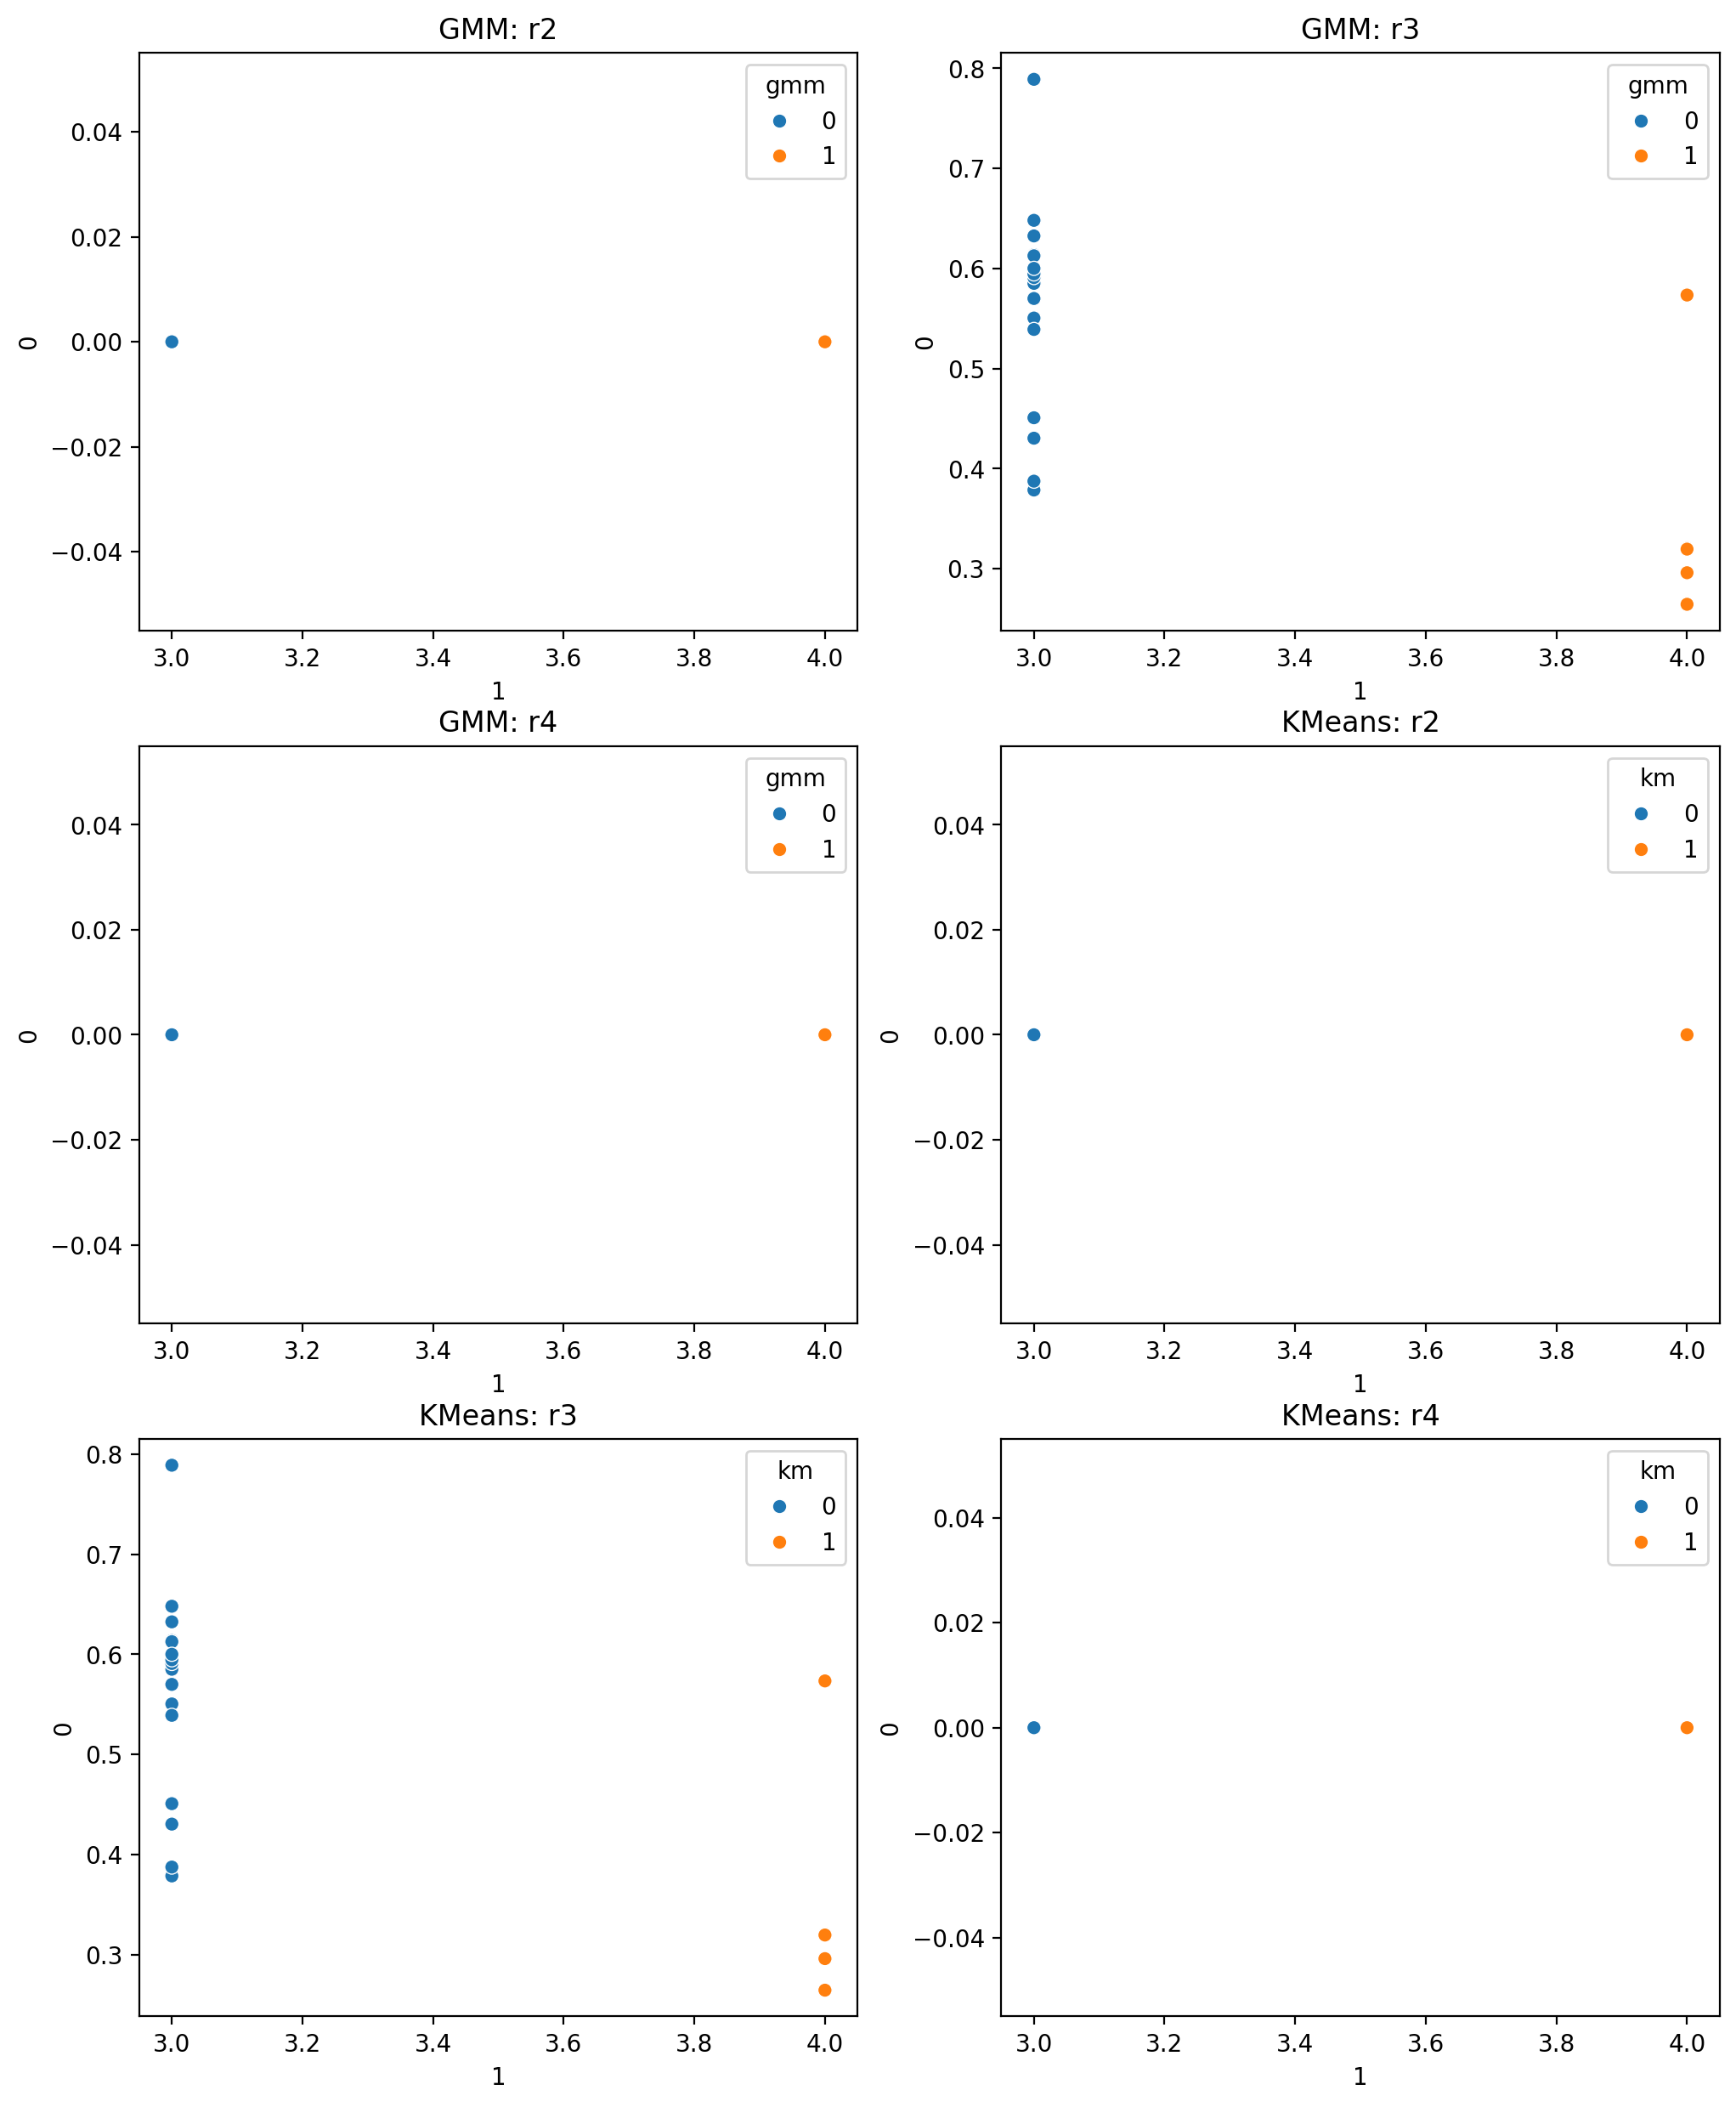

In [42]:
plt.figure(figsize=(12, 15), dpi=200)

plt.subplot(3, 2, 1)
sns.scatterplot(x=df_r2[1], y=df_r2[0], hue=df_r2['gmm'])
plt.title('GMM: r2')

plt.subplot(3, 2, 2)
sns.scatterplot(x=df_r3[1], y=df_r3[0], hue=df_r3['gmm'])
plt.title('GMM: r3')

plt.subplot(3, 2, 3)
sns.scatterplot(x=df_r4[1], y=df_r4[0], hue=df_r4['gmm'])
plt.title('GMM: r4')

plt.subplot(3, 2, 4)
sns.scatterplot(x=df_r2[1], y = df_r2[0], hue=df_r2['km'])
plt.title('KMeans: r2')

plt.subplot(3, 2, 5)
sns.scatterplot(x=df_r3[1], y=df_r3[0], hue=df_r3['km'])
plt.title('KMeans: r3')

plt.subplot(3, 2, 6)
sns.scatterplot(x=df_r4[1], y=df_r4[0], hue=df_r4['km'])
plt.title('KMeans: r4')

In [45]:
value_counts

r1
0.000000       40127
0.012846           1
0.058363           1
0.071174           1
0.098103           1
               ...  
515.825385         1
686.450304         1
789.178131         1
1171.235274        1
7141.995000        1
Name: count, Length: 2389, dtype: int64

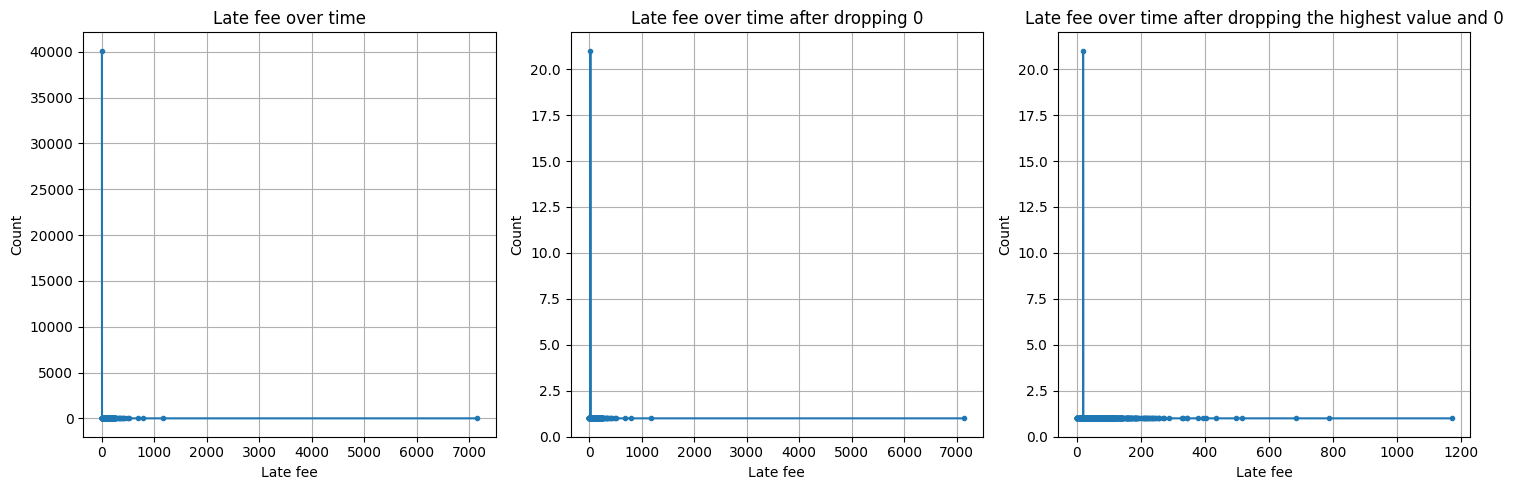

In [44]:
# Calculate frequency
value_counts = df['r1'].value_counts().sort_index()

plt.figure(figsize=(15, 5))

# Plot
plt.subplot(1, 3, 1)
plt.plot(value_counts.index, value_counts.values, marker='.', linestyle='-')
plt.xlabel('Late fee')
plt.ylabel('Count')
plt.title('Late fee over time')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(value_counts.drop(0).index, value_counts.drop(0).values, marker='.', linestyle='-')
plt.xlabel('Late fee')
plt.ylabel('Count')
plt.title('Late fee over time after dropping 0')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(value_counts.drop([0, 7141.995000]).index, value_counts.drop([0, 7141.995000]).values, marker='.', linestyle='-')
plt.xlabel('Late fee')
plt.ylabel('Count')
plt.title('Late fee over time after dropping the highest value and 0')
plt.grid(True)

plt.tight_layout()
plt.show()

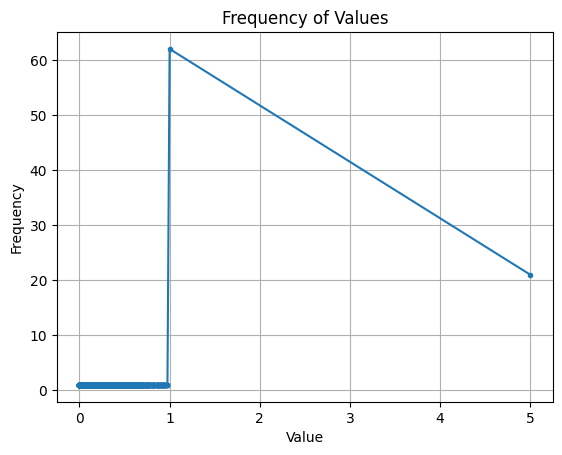

In [46]:
# Calculate frequency
value_counts = df['r2'].value_counts().sort_index()

# Plot
plt.plot(value_counts.drop(0).index, value_counts.drop(0).values, marker='.', linestyle='-')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of Values')
plt.grid(True)
plt.show()

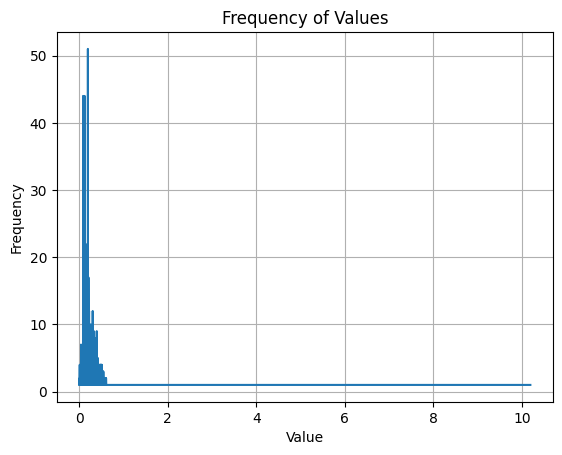

In [47]:
# Calculate frequency
value_counts = df['r3'].value_counts().sort_index()

# Plot
plt.plot(value_counts.drop(0).index, value_counts.drop(0).values, linestyle='-')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of Values')
plt.grid(True)
plt.show()

In [48]:
value_counts

r3
0.000000     86
0.004573      1
0.004583      1
0.004589      1
0.004643      1
             ..
5.131868      1
6.814866      1
6.867669      1
8.816522      1
10.194248     1
Name: count, Length: 38082, dtype: int64

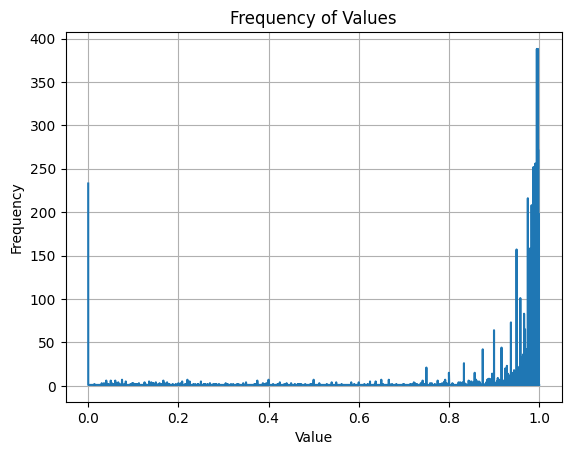

In [49]:
# Calculate frequency
value_counts = df['r4'].value_counts().sort_index()

# Plot
plt.plot(value_counts.drop(1).index, value_counts.drop(1).values)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of Values')
plt.grid(True)
plt.show()